## Random Forest Fraud_data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
#import dataset
data = pd.read_csv('Fraud_check.csv')

In [4]:
data

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

### EDA and Visualization

In [5]:
data.shape

(600, 6)

In [6]:
data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [12]:
data['Taxable.Income'].unique()

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [13]:
len(data['Taxable.Income'].unique())

599

In [14]:
data['Taxable.Income'].values

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [16]:
#Converting the sales column which is continous into categorical
category = pd.cut(data['Taxable.Income'],bins=[0,30000,99619],labels = ['Risky', 'Good'])
data.insert(0, 'Taxable_Group',category)

In [17]:
data

Taxable_Group Undergrad Marital.Status  Taxable.Income  City.Population  \
0            Good        NO         Single           68833            50047   
1            Good       YES       Divorced           33700           134075   
2            Good        NO        Married           36925           160205   
3            Good       YES         Single           50190           193264   
4            Good        NO        Married           81002            27533   
..            ...       ...            ...             ...              ...   
595          Good       YES       Divorced           76340            39492   
596          Good       YES       Divorced           69967            55369   
597          Good        NO       Divorced           47334           154058   
598          Good       YES        Married           98592           180083   
599          Good        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 7 columns]

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder =LabelEncoder()
data['Undergrad']=encoder.fit_transform(data['Undergrad'])
data['Marital.Status']=encoder.fit_transform(data['Marital.Status'])
data['Urban']=encoder.fit_transform(data['Urban'])

In [20]:
data['Taxable_Group'] = encoder.fit_transform(data['Taxable_Group'])

In [21]:
data

Taxable_Group  Undergrad  Marital.Status  Taxable.Income  \
0                0          0               2           68833   
1                0          1               0           33700   
2                0          0               1           36925   
3                0          1               2           50190   
4                0          0               1           81002   
..             ...        ...             ...             ...   
595              0          1               0           76340   
596              0          1               0           69967   
597              0          0               0           47334   
598              0          1               1           98592   
599              0          0               0           96519   

     City.Population  Work.Experience  Urban  
0              50047               10      1  
1             134075               18      1  
2             160205               30      1  
3             193264               15      1  
4              27533               28      0  
..               ...              ...    ...  
595            39492                7      1  
596            55369                2      1  
597           154058                0      1  
598           180083               17      0  
599           158137               16      0  

[600 rows x 7 columns]

(array([[600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 63., 146., 125., 132., 134.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  58.,  73.,  72.,  72.,  74.,  69.,  63.,  54.,  65.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  19977.8,  39955.6,  59933.4,  79911.2,  99889. ,
        119866.8, 139844.6, 159822.4, 179800.2, 199778. ]),
 <a list of 7 BarContainer objects>)

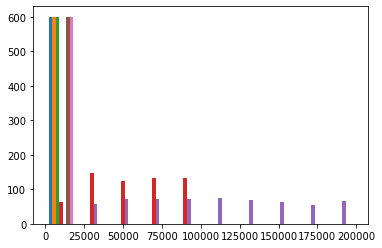

In [28]:
plt.hist(data)

In [25]:
data.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'Taxable_Group'}>,
        <AxesSubplot:title={'center':'Undergrad'}>,
        <AxesSubplot:title={'center':'Marital.Status'}>],
       [<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>],
       [<AxesSubplot:title={'center':'Urban'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [29]:
data.boxplot(figsize=(20,20))

<AxesSubplot:>

In [30]:
(data['Taxable_Group'].unique())

array([0, 1])

In [31]:
data['Taxable_Group'].value_counts()

0    476
1    124
Name: Taxable_Group, dtype: int64

In [32]:
data['Taxable_Group'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [34]:
data1 = data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]

In [35]:
X = data1
y = data['Taxable_Group']

In [36]:
X

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]

In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Group, Length: 600, dtype: int32

In [41]:
y_test.value_counts(),y_train.value_counts()

(0    138
 1     42
 Name: Taxable_Group, dtype: int64,
 0    338
 1     82
 Name: Taxable_Group, dtype: int64)

In [39]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =10)

In [42]:
model = RandomForestClassifier(n_estimators=100,max_depth=3, criterion = 'gini', random_state=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7666666666666667


In [45]:
pd.crosstab(y_pred,y_test)

Taxable_Group    0   1
row_0                 
0              138  42

In [46]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

42

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       138
           1       0.00      0.00      0.00        42

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
kfold = KFold(n_splits=10, shuffle = True, random_state=None)
model1 = RandomForestClassifier(n_estimators=100,max_features = 3)
results = cross_val_score(model1,X,y, cv=kfold)

In [52]:
print(results)

[0.71666667 0.71666667 0.73333333 0.81666667 0.76666667 0.8
 0.63333333 0.66666667 0.81666667 0.73333333]


In [53]:
print(np.mean(results))

0.74


In [54]:
from sklearn.ensemble import BaggingClassifier

In [55]:
kfold1 = KFold(n_splits =10,shuffle = True, random_state = 10)
model2 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features =3)
model3 = BaggingClassifier(base_estimator = model2,n_estimators =100,random_state=10)


In [57]:
results1 = cross_val_score(model3,X,y, cv=kfold1)

In [58]:
print(results1)

[0.78333333 0.71666667 0.71666667 0.81666667 0.81666667 0.75
 0.75       0.73333333 0.8        0.85      ]


In [59]:
print(np.mean(results1))

0.7733333333333332


In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
kfold2 = KFold(n_splits=10, random_state=10,shuffle=True)
model = AdaBoostClassifier(n_estimators=100, random_state=10)
results2 = cross_val_score(model, X, y, cv=kfold2)
print(results2.mean())

0.7766666666666666
